In [1]:
import json
import os
from pprint import pprint

import nltk
from nltk import tag
from nltk import tokenize
import textstat
import numpy as np
import matplotlib.pyplot as plt



In [2]:
nltk.download('treebank')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package treebank to /home/bz/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/bz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/bz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
rootdir ='../data'

self_report_guidelines = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file == "guidelines.json":
            with open(file_path, 'r') as myfile:
                data = json.load(myfile)
                
                self_reporting = data['self_reporting']
                if self_reporting:
                    
                    self_report_guidelines.append({
                        "text": self_reporting,
                        "file": file_path
                        
                    })

In [4]:
# for guideline in self_report_guidelines:
#     sents = tokenize.sent_tokenize(guideline['text'])
#     if len(sents)>2:
#         pprint(guideline)

# #     for sent in sents:
# #         tokenized_sent = tokenize.word_tokenize(sent)
# #         tagged_sent = tag.pos_tag([word.lower() for word in tokenized_sent])
# #         print(tagged_sent)
# #pprint(self_report_guidelines)
# len(self_report_guidelines)

In [5]:
# sententce = """Students must contact the NMT Nurse Practitioner (575-835-5094 or 
#           https://www.nmt.edu/studenthealth) and Dean of Students 
#           (deanofstudents@nmt.edu) and seek medical advice."""

# tokenized_sent = tokenize.word_tokenize(sententce)
# print(tag.pos_tag([word.lower() for word in tokenized_sent]))


In [6]:
sentiment = {}
mandatory = []
suggested = []

for guideline in self_report_guidelines:
    tokenized_sent = tokenize.word_tokenize(guideline['text'])
    tagged_sent = tag.pos_tag([word.lower() for word in tokenized_sent])

    if ('required', 'VBN') in tagged_sent or \
        ('require', 'VB') in tagged_sent or \
        ('requiring', 'VBG') in tagged_sent or\
        ('required', 'JJ') in tagged_sent or\
        ('requires', 'VBZ') in tagged_sent:
        if 'require' not in sentiment:
            sentiment['require'] = []
        sentiment['require'].append(guideline['text'])
        mandatory.append(guideline)
    elif ('mandatory', 'JJ') in tagged_sent:
        if 'mandatory' not in sentiment:
            sentiment['mandatory'] = []
        sentiment['mandatory'].append(guideline['text'])
        mandatory.append(guideline)

    elif ('must', 'MD') in tagged_sent:
        if 'must' not in sentiment:
            sentiment['must'] = []
        sentiment['must'].append(guideline['text'])
        mandatory.append(guideline)
    elif ('expected', 'VBN') in tagged_sent:
        if 'expected' not in sentiment:
            sentiment['expected'] = []
        sentiment['expected'].append(guideline['text'])
        suggested.append(guideline)
    elif ('should', 'MD') in tagged_sent:
        if 'should' not in sentiment:
            sentiment['should'] = []
        sentiment['should'].append(guideline['text'])
        suggested.append(guideline)

    elif ('may', 'MD') in tagged_sent:
        if 'may' not in sentiment:
            sentiment['may'] = []
        sentiment['may'].append(guideline['text'])  
        suggested.append(guideline)
    elif ('please', 'VB') in tagged_sent or ('please', 'NN') in tagged_sent:
        if 'please' not in sentiment:
            sentiment['please'] = []
        sentiment['please'].append(guideline['text'])
        suggested.append(guideline)
    elif ('encouraged', 'VBN') in tagged_sent:
        if 'encourage' not in sentiment:
            sentiment['encourage'] = []
        sentiment['encourage'].append(guideline['text'])
        suggested.append(guideline)
    elif ('asks', 'VBZ') in tagged_sent or\
        ('asked', 'VBN') in tagged_sent or \
        ('asking', 'VBG') in tagged_sent:
        if 'asks' not in sentiment:
            sentiment['asks'] = []
        sentiment['asks'].append(guideline['text'])
        suggested.append(guideline)
    elif ('requested', 'VBN') in tagged_sent:
        if 'requested' not in sentiment:
            sentiment['requested'] = []
        sentiment['requested'].append(guideline['text'])
        suggested.append(guideline)
    elif ('vital', 'JJ') in tagged_sent:
        if 'vital' not in sentiment:
            sentiment['vital'] = []
        sentiment['vital'].append(guideline['text'])
    elif ('important', 'JJ') in tagged_sent:
        if 'critically_important' not in sentiment:
            sentiment['critically_important'] = []
        sentiment['critically_important'].append(guideline['text'])
    
    else:
        if 'other' not in sentiment:
            sentiment['other'] = []
        sentiment['other'].append(guideline['text'])


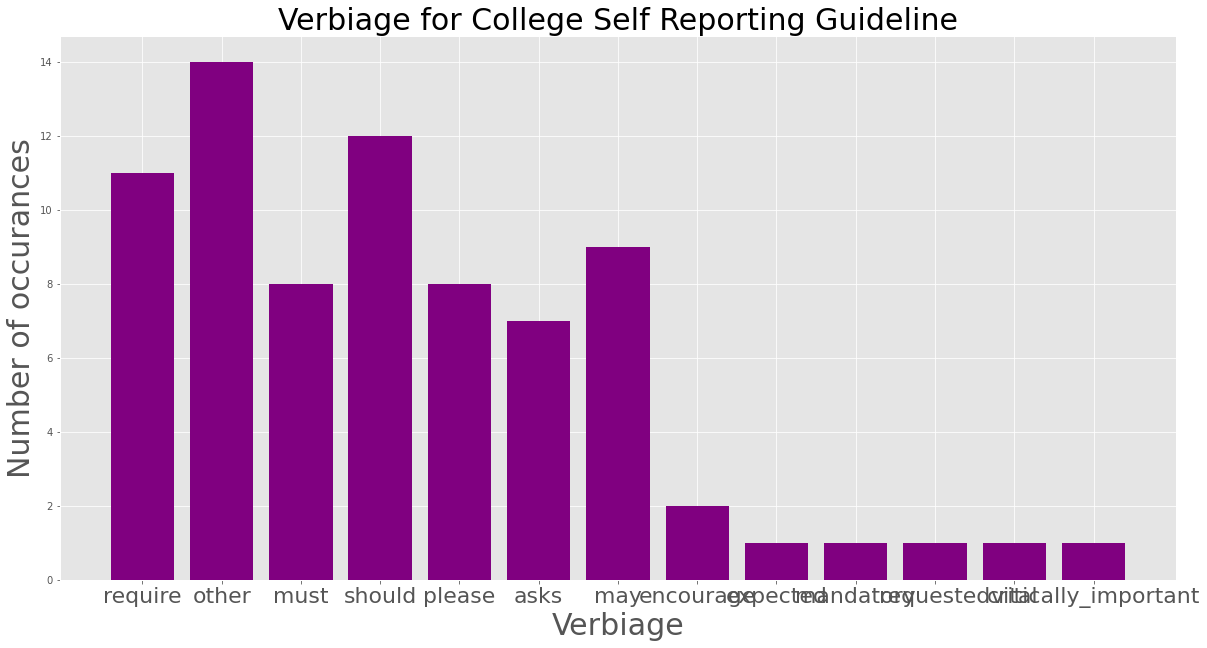

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20,10))


x = sentiment.keys()
y = [len(sent) for sent in sentiment.values()]


x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='purple')
plt.xlabel("Verbiage", fontsize=30)
plt.ylabel("Number of occurances", fontsize=30)
plt.title("Verbiage for College Self Reporting Guideline", fontsize=30)
plt.xticks(fontsize=22 )
plt.xticks(x_pos, x)
plt.savefig('../figures/guideline-verbiage.png')

plt.show()


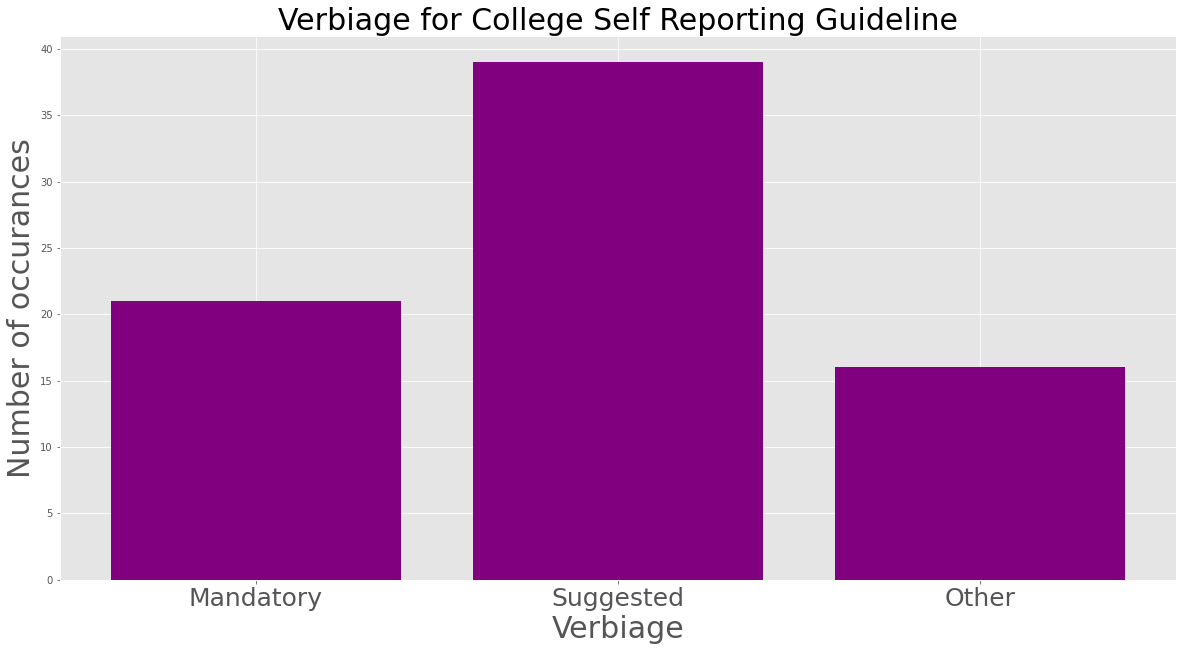

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20,10))


x = ["Mandatory", "Suggested", "Other"]#sentiment.keys()
y = [21, 39, 16]#[len(sent) for sent in sentiment.values()]


x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='purple')
plt.xlabel("Verbiage", fontsize =30)
plt.ylabel("Number of occurances", fontsize =30)
plt.title("Verbiage for College Self Reporting Guideline", fontsize =30)

plt.xticks(x_pos, x, fontsize=25 )
plt.savefig('../figures/guideline-verbiage.png')

plt.show()

In [15]:
number_self_reporting_site = 0
number_privacy_policy =0 
mandatory_readability = []

for school in mandatory:
    file = school['file']
    file =  file.replace('guidelines.json', 'privacy_policy.json')
    with open(file, 'r') as myfile:
        data = json.load(myfile)
        if data.get("privacy_policy"):
            policy = data["privacy_policy"][0]            
            if policy.get("policy_text"):
                number_privacy_policy=number_privacy_policy+1
                if policy.get("is_covid_specific"):
                #print(file)
                #print(textstat.flesch_kincaid_grade(policy.get("policy_text")))
                    mandatory_readability.append(textstat.flesch_kincaid_grade(policy.get("policy_text")))
                    if textstat.flesch_kincaid_grade(policy.get("policy_text")) >50:
                        print(file)

            if data.get("has_self_reporting_site") is not None:
                number_self_reporting_site = number_self_reporting_site+1
print(number_privacy_policy)        
print(mandatory_readability)

number_self_reporting_site = 0
number_privacy_policy =0 
suggested_readability = []

for school in suggested:
    file = school['file']
    file =  file.replace('guidelines.json', 'privacy_policy.json')
    with open(file, 'r') as myfile:
        data = json.load(myfile)
        if data.get("privacy_policy"):
            policy = data["privacy_policy"][0]            
            if policy.get("policy_text"):
                if policy.get("is_covid_specific"):

                    number_privacy_policy=number_privacy_policy+1

                    #print(file)
                    #print(textstat.flesch_kincaid_grade(policy.get("policy_text")))
                    suggested_readability.append(textstat.flesch_kincaid_grade(policy.get("policy_text")))

            if data.get("has_self_reporting_site") is not None:
                number_self_reporting_site = number_self_reporting_site+1

print(number_privacy_policy)        
print(suggested_readability)

TypeError: unhashable type: 'list'

In [16]:
mandatory_readability = [round(x) for x in mandatory_readability]
suggested_readability = [round(x) for x in suggested_readability]

print(suggested_readability)
print(mandatory_readability)

plt.figure(figsize=(20,10))


n_bins = 26
x= [mandatory_readability, suggested_readability]
fig = plt.subplot()

colors = ['red', 'blue']
fig.hist(x, n_bins, histtype='bar', color=colors, label=["Mandatory", "Suggested"])
fig.legend(prop={'size': 10}, fontsize =25)
fig.set_title('FKG Readability Score of Mandatory and Suggested Privacy Policies', fontsize =25)
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )

plt.savefig('../figures/readability_mandatory_suggested.png')

plt.show()

NameError: name 'suggested_readability' is not defined